In [1]:
!pip install neptune-client

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

import numpy as np


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
import neptune
API_TOKEN='' #@param {type:"string"}
PROJEKT_NAME = 'stokrotka/anulowanie-wizyty'

neptune.init(
    api_token=API_TOKEN,
    project_qualified_name=PROJEKT_NAME
)

Project(stokrotka/anulowanie-wizyty)

In [4]:
dataset = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Cancellation/data/KaggleV2-May-2016.csv')
dataset.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [5]:
dataset.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [6]:
neptune.create_experiment(
    name='data_visualisation'
)

neptune.append_tags(['data_visualisation', 'finished_successfully'])

#neptune.stop()

NVMLError: Driver Not Loaded - GPU usage metrics may not be reported.


https://ui.neptune.ai/stokrotka/anulowanie-wizyty/e/AN-10


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB




> PatientID


Zmana PatientID na int 

Sprawdzenie wartości unikalnych

In [8]:
dataset['PatientId'] = dataset['PatientId'].astype('int64')

In [9]:
len(dataset['PatientId'].unique())

62299



> AppointmentID   
Zmana AppointmentID na int

Sprawdzenie wartości unikalnych



In [10]:
dataset['AppointmentID'] = dataset['AppointmentID'].astype('int64')
len(dataset['AppointmentID'].unique())

110527

In [11]:
dataset.drop('AppointmentID', axis =1, inplace=True)

In [12]:
dataset.head()

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,29872499824296,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [13]:
dataset['AppointmentDay'] = pd.to_datetime(dataset['AppointmentDay'])
dataset['AppointmentDay'].dt.month.unique()

array([4, 5, 6])

In [14]:
print("Unique Values in `AppointmentDay` => {}".format(np.sort(dataset.AppointmentDay.dt.strftime('%Y-%m-%d').unique())))

Unique Values in `AppointmentDay` => ['2016-04-29' '2016-05-02' '2016-05-03' '2016-05-04' '2016-05-05'
 '2016-05-06' '2016-05-09' '2016-05-10' '2016-05-11' '2016-05-12'
 '2016-05-13' '2016-05-14' '2016-05-16' '2016-05-17' '2016-05-18'
 '2016-05-19' '2016-05-20' '2016-05-24' '2016-05-25' '2016-05-30'
 '2016-05-31' '2016-06-01' '2016-06-02' '2016-06-03' '2016-06-06'
 '2016-06-07' '2016-06-08']


In [15]:
dataset['ScheduledDay'] = pd.to_datetime(dataset['ScheduledDay'])
dataset['ScheduledDay'].dt.month.unique()

array([ 4,  3,  2,  1,  5, 11, 12,  6])

In [16]:
print("Unique Values in `ScheduledDay` => {}".format(np.sort(dataset.ScheduledDay.dt.strftime('%Y-%m-%d').unique())))

Unique Values in `ScheduledDay` => ['2015-11-10' '2015-12-03' '2015-12-07' '2015-12-08' '2015-12-14'
 '2015-12-15' '2016-01-04' '2016-01-05' '2016-01-07' '2016-01-11'
 '2016-01-13' '2016-01-14' '2016-01-19' '2016-01-20' '2016-01-21'
 '2016-01-22' '2016-01-25' '2016-01-26' '2016-01-27' '2016-01-28'
 '2016-01-29' '2016-02-01' '2016-02-02' '2016-02-03' '2016-02-04'
 '2016-02-05' '2016-02-11' '2016-02-12' '2016-02-15' '2016-02-16'
 '2016-02-17' '2016-02-18' '2016-02-19' '2016-02-22' '2016-02-23'
 '2016-02-24' '2016-02-25' '2016-02-26' '2016-02-29' '2016-03-01'
 '2016-03-02' '2016-03-03' '2016-03-04' '2016-03-05' '2016-03-07'
 '2016-03-08' '2016-03-09' '2016-03-10' '2016-03-11' '2016-03-14'
 '2016-03-15' '2016-03-16' '2016-03-17' '2016-03-18' '2016-03-19'
 '2016-03-21' '2016-03-22' '2016-03-23' '2016-03-28' '2016-03-29'
 '2016-03-30' '2016-03-31' '2016-04-01' '2016-04-05' '2016-04-06'
 '2016-04-07' '2016-04-08' '2016-04-09' '2016-04-11' '2016-04-12'
 '2016-04-13' '2016-04-14' '2016-04-15' '

In [17]:
dataset['ScheduledDay'] = pd.to_datetime(dataset['ScheduledDay'])

dataset['ScheduleTime'] = dataset.ScheduledDay.dt.time
dataset['ScheduleHour'] = dataset.ScheduledDay.dt.hour
dataset['ScheduledDay'] = dataset.ScheduledDay.dt.date
dataset['ScheduledDay'] = pd.to_datetime(dataset['ScheduledDay'])
dataset['ScheduleDayName'] = dataset.ScheduledDay.dt.day_name()
dataset['ScheduleMonthName'] = dataset.ScheduledDay.dt.month_name()

dataset['AppointmentDay'] = pd.to_datetime(dataset['AppointmentDay'])
dataset['AppointmentTime'] = dataset.AppointmentDay.dt.time

dataset['AppointmentDay'] = dataset.AppointmentDay.dt.date
dataset['AppointmentDay'] = pd.to_datetime(dataset['AppointmentDay'])
dataset['AppointmentDayName'] = dataset.AppointmentDay.dt.day_name()
dataset['AppointmentMonthName'] = dataset.AppointmentDay.dt.month_name()



In [18]:
dataset.head()

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,ScheduleTime,ScheduleHour,ScheduleDayName,ScheduleMonthName,AppointmentTime,AppointmentDayName,AppointmentMonthName
0,29872499824296,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,18:38:08,18,Friday,April,00:00:00,Friday,April
1,558997776694438,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,16:08:27,16,Friday,April,00:00:00,Friday,April
2,4262962299951,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,16:19:04,16,Friday,April,00:00:00,Friday,April
3,867951213174,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,17:29:31,17,Friday,April,00:00:00,Friday,April
4,8841186448183,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,16:07:23,16,Friday,April,00:00:00,Friday,April


In [19]:
dataset['AppointmentTime'].unique()

array([datetime.time(0, 0)], dtype=object)

In [20]:
dataset.drop('AppointmentTime',axis =1, inplace = True)

In [21]:
dataset.head()

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,ScheduleTime,ScheduleHour,ScheduleDayName,ScheduleMonthName,AppointmentDayName,AppointmentMonthName
0,29872499824296,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,18:38:08,18,Friday,April,Friday,April
1,558997776694438,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,16:08:27,16,Friday,April,Friday,April
2,4262962299951,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,16:19:04,16,Friday,April,Friday,April
3,867951213174,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,17:29:31,17,Friday,April,Friday,April
4,8841186448183,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,16:07:23,16,Friday,April,Friday,April


In [22]:
dataset['Scholarship'] = dataset['Scholarship'].astype('object')
dataset['Hipertension'] = dataset['Hipertension'].astype('object')
dataset['Diabetes'] = dataset['Diabetes'].astype('object')
dataset['Alcoholism'] = dataset['Alcoholism'].astype('object')
dataset['Handcap'] = dataset['Handcap'].astype('object')
dataset['SMS_received'] = dataset['SMS_received'].astype('object')

In [23]:
dataset.dtypes

PatientId                        int64
Gender                          object
ScheduledDay            datetime64[ns]
AppointmentDay          datetime64[ns]
Age                              int64
Neighbourhood                   object
Scholarship                     object
Hipertension                    object
Diabetes                        object
Alcoholism                      object
Handcap                         object
SMS_received                    object
No-show                         object
ScheduleTime                    object
ScheduleHour                     int64
ScheduleDayName                 object
ScheduleMonthName               object
AppointmentDayName              object
AppointmentMonthName            object
dtype: object

In [24]:
for col in dataset.columns:
  if( dataset[col].dtypes == 'object' and col != 'ScheduledDay' and col != 'AppointmentDay' and col != 'ScheduleTime'):
    print(col)
    print(dataset[col].unique())

Gender
['F' 'M']
Neighbourhood
['JARDIM DA PENHA' 'MATA DA PRAIA' 'PONTAL DE CAMBURI' 'REPÚBLICA'
 'GOIABEIRAS' 'ANDORINHAS' 'CONQUISTA' 'NOVA PALESTINA' 'DA PENHA'
 'TABUAZEIRO' 'BENTO FERREIRA' 'SÃO PEDRO' 'SANTA MARTHA' 'SÃO CRISTÓVÃO'
 'MARUÍPE' 'GRANDE VITÓRIA' 'SÃO BENEDITO' 'ILHA DAS CAIEIRAS'
 'SANTO ANDRÉ' 'SOLON BORGES' 'BONFIM' 'JARDIM CAMBURI' 'MARIA ORTIZ'
 'JABOUR' 'ANTÔNIO HONÓRIO' 'RESISTÊNCIA' 'ILHA DE SANTA MARIA'
 'JUCUTUQUARA' 'MONTE BELO' 'MÁRIO CYPRESTE' 'SANTO ANTÔNIO' 'BELA VISTA'
 'PRAIA DO SUÁ' 'SANTA HELENA' 'ITARARÉ' 'INHANGUETÁ' 'UNIVERSITÁRIO'
 'SÃO JOSÉ' 'REDENÇÃO' 'SANTA CLARA' 'CENTRO' 'PARQUE MOSCOSO'
 'DO MOSCOSO' 'SANTOS DUMONT' 'CARATOÍRA' 'ARIOVALDO FAVALESSA'
 'ILHA DO FRADE' 'GURIGICA' 'JOANA D´ARC' 'CONSOLAÇÃO' 'PRAIA DO CANTO'
 'BOA VISTA' 'MORADA DE CAMBURI' 'SANTA LUÍZA' 'SANTA LÚCIA'
 'BARRO VERMELHO' 'ESTRELINHA' 'FORTE SÃO JOÃO' 'FONTE GRANDE'
 'ENSEADA DO SUÁ' 'SANTOS REIS' 'PIEDADE' 'JESUS DE NAZARETH'
 'SANTA TEREZA' 'CRUZAMENTO' 'ILHA 



> No-show





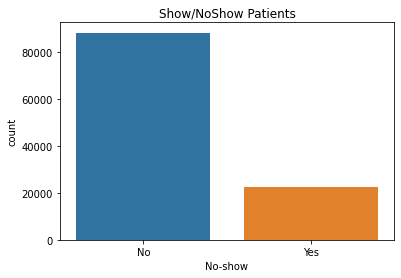

In [25]:
fig, ax = plt.subplots(1, 1)
ax = sns.countplot(x=dataset["No-show"])
ax.set_title("Show/NoShow Patients")
plt.show()
neptune.log_image('No-show', fig)

In [26]:
dataset["No-show"].describe()

count     110527
unique         2
top           No
freq       88208
Name: No-show, dtype: object

In [27]:
def histogram(set, feature, hue, title1=None, title2=None,by=None, bins = 100):
 
  fig, axes = plt.subplots(4, 1, figsize=(25, 15))

  axes[0].set_title(title1)
  sns.countplot(x=feature,data=set, ax=axes[0])
  axes[0].set_xlabel(feature)

  axes[1].set_title(title2)
  sns.countplot(x=feature,hue=hue,data=set, ax=axes[1])
  axes[1].set_xlabel(feature)



  temp = set[set[hue] == 'No'].groupby([feature]).size()/set.groupby([feature]).size()
  axes[2] = sns.barplot(x=temp.index, y=temp, ax=axes[2])
  axes[2].set_title("Percentage No")

  temp = set[set[hue] == 'Yes'].groupby([feature]).size()/set.groupby([feature]).size()
  axes[3] = sns.barplot(x=temp.index, y=temp, ax=axes[3])
  axes[3].set_title("Percentage Yes")

  plt.tight_layout()
  plt.show()
  neptune.log_image(feature, fig)

In [28]:
def boxplot(set, feature, hue):
  sns.catplot(y=feature, kind="box", data=set);
  sns.catplot(x=hue, y=feature , kind="box", data=set);
  neptune.log_image(feature, fig)



> Age



In [29]:
dataset['Age'].describe()

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

In [30]:
dataset[dataset['Age']<0]

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,ScheduleTime,ScheduleHour,ScheduleDayName,ScheduleMonthName,AppointmentDayName,AppointmentMonthName
99832,465943158731293,F,2016-06-06,2016-06-06,-1,ROMÃO,0,0,0,0,0,0,No,08:58:13,8,Monday,June,Monday,June


In [31]:
index = dataset[dataset['Age']<0].index

In [32]:
dataset.drop(index,inplace=True) 

In [33]:
dataset[dataset['Age']<0]

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,ScheduleTime,ScheduleHour,ScheduleDayName,ScheduleMonthName,AppointmentDayName,AppointmentMonthName


In [34]:
dataset['Age'].describe()

count    110526.000000
mean         37.089219
std          23.110026
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

In [35]:
dataset[dataset['Age']>100]

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,ScheduleTime,ScheduleHour,ScheduleDayName,ScheduleMonthName,AppointmentDayName,AppointmentMonthName
58014,976294799775439,F,2016-05-03,2016-05-03,102,CONQUISTA,0,0,0,0,0,0,No,09:14:53,9,Tuesday,May,Tuesday,May
63912,31963211613981,F,2016-05-16,2016-05-19,115,ANDORINHAS,0,0,0,0,1,0,Yes,09:17:44,9,Monday,May,Thursday,May
63915,31963211613981,F,2016-05-16,2016-05-19,115,ANDORINHAS,0,0,0,0,1,0,Yes,09:17:44,9,Monday,May,Thursday,May
68127,31963211613981,F,2016-04-08,2016-05-16,115,ANDORINHAS,0,0,0,0,1,0,Yes,14:29:17,14,Friday,April,Monday,May
76284,31963211613981,F,2016-05-30,2016-05-30,115,ANDORINHAS,0,0,0,0,1,0,No,09:44:51,9,Monday,May,Monday,May
90372,234283596548,F,2016-05-31,2016-06-02,102,MARIA ORTIZ,0,0,0,0,0,0,No,10:19:49,10,Tuesday,May,Thursday,June
97666,748234579244724,F,2016-05-19,2016-06-03,115,SÃO JOSÉ,0,1,0,0,0,1,No,07:57:56,7,Thursday,May,Friday,June


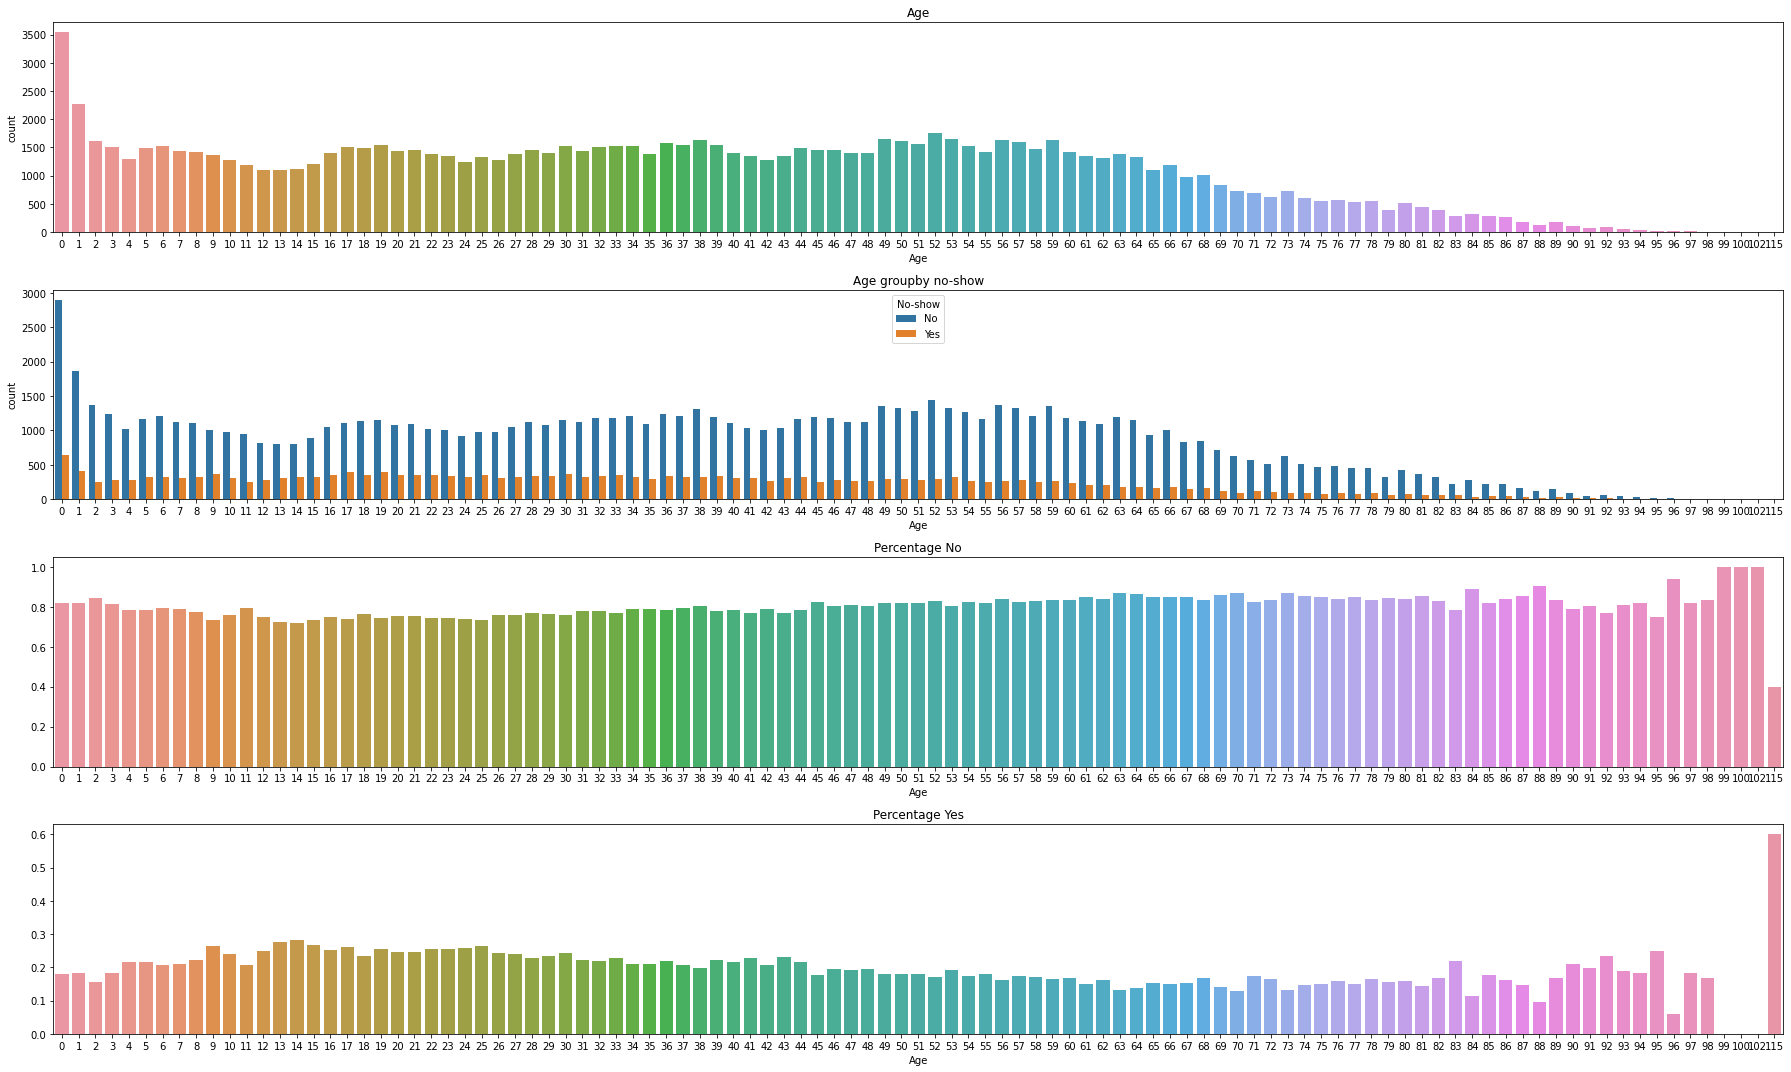

In [36]:
histogram(dataset, 'Age', 'No-show',"Age", "Age groupby no-show" )

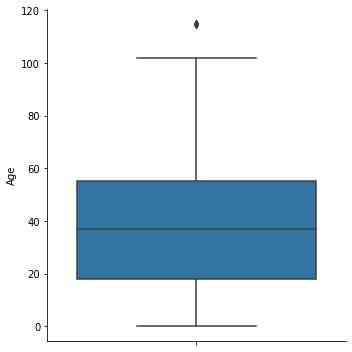

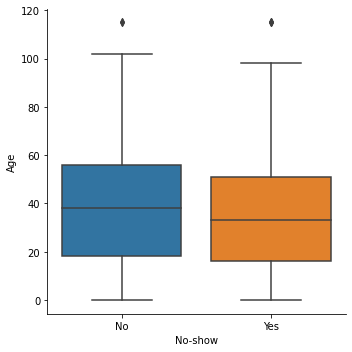

In [37]:
boxplot(dataset, "Age", "No-show")




> Gender





In [38]:
def categoricalPLot(set, feature, hue, figsize = (15, 15)):
  fig, axes = plt.subplots(4, 1, figsize=figsize)

  axes[0] = sns.countplot(x=set[feature], ax=axes[0])

  axes[1] = sns.countplot(x=set[feature],hue=set[hue], ax=axes[1])

  temp = set[set[hue] == 'No'].groupby([feature]).size()/set.groupby([feature]).size()
  axes[2] = sns.barplot(x=temp.index, y=temp, ax=axes[2]).set_title('Percentage No')

  temp = set[set[hue] == 'Yes'].groupby([feature]).size()/set.groupby([feature]).size()
  axes[2] = sns.barplot(x=temp.index, y=temp, ax=axes[3]).set_title('Percentage Yes')


  fig.tight_layout()
  plt.show()
  neptune.log_image(feature, fig)

In [39]:
def categoricalPLotY(set, feature, hue, figsize = (15, 15)):
  fig, axes = plt.subplots(4, 1, figsize=figsize)
  
  
  axes[0] = sns.countplot(y=set[feature], ax=axes[0])

  axes[1] = sns.countplot(y=set[feature],hue=set[hue], ax=axes[1])
  
  temp = set[set[hue] == 'No'].groupby([feature]).size()/set.groupby([feature]).size()
  axes[2] = sns.barplot(y=temp.index, x=temp, ax=axes[2]).set_title('Percentage No')

  temp = set[set[hue] == 'Yes'].groupby([feature]).size()/set.groupby([feature]).size()
  axes[2] = sns.barplot(y=temp.index, x=temp, ax=axes[3]).set_title('Percentage Yes')
  fig.tight_layout()
  plt.show()
  neptune.log_image(feature, fig)

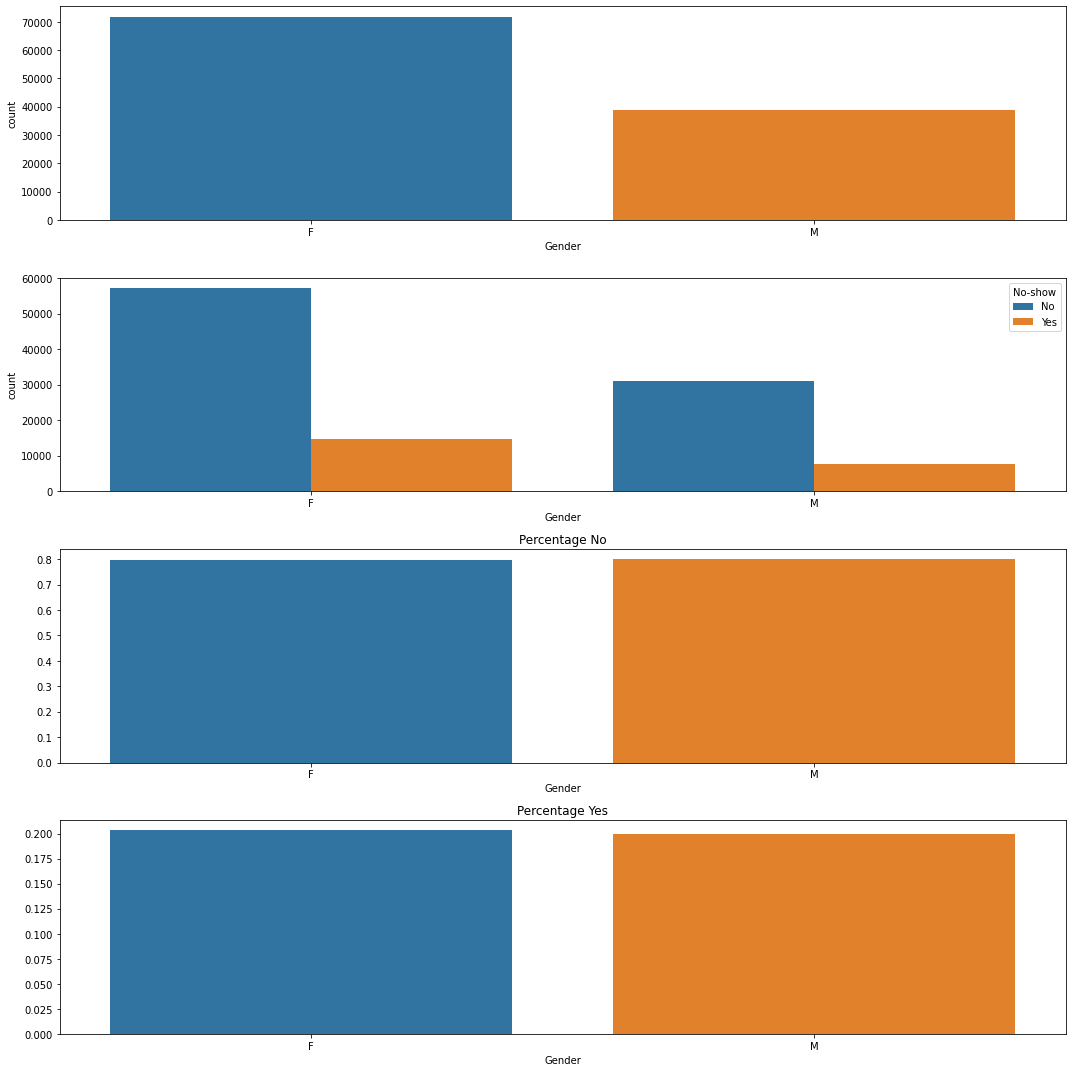

In [40]:
categoricalPLot(dataset, "Gender", "No-show")



> Neighbourhood



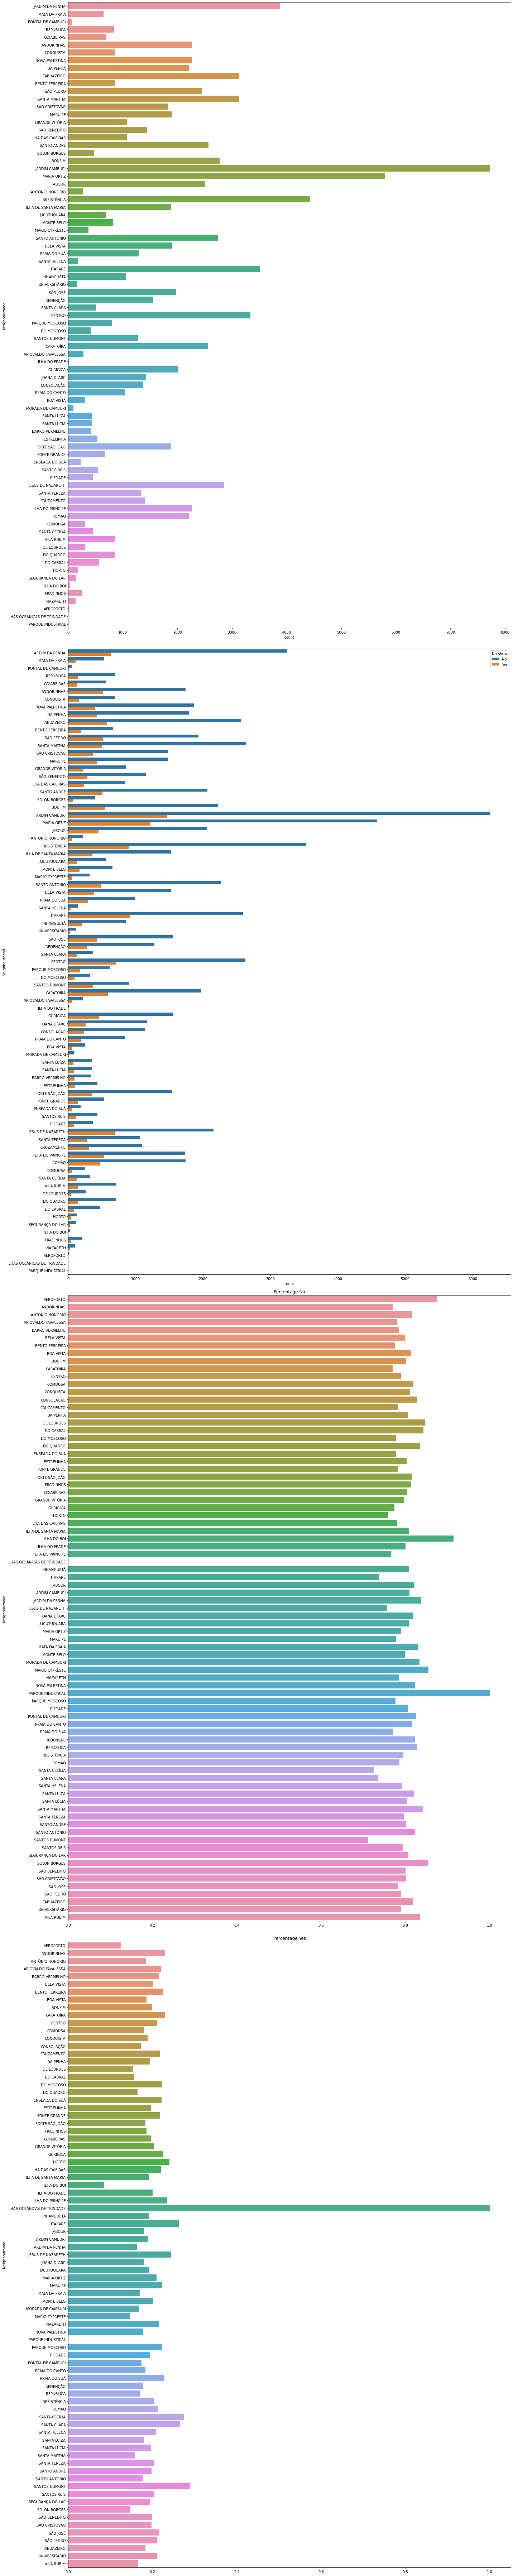

In [41]:
categoricalPLotY(dataset, "Neighbourhood", "No-show", (20,100))



> Scholarship



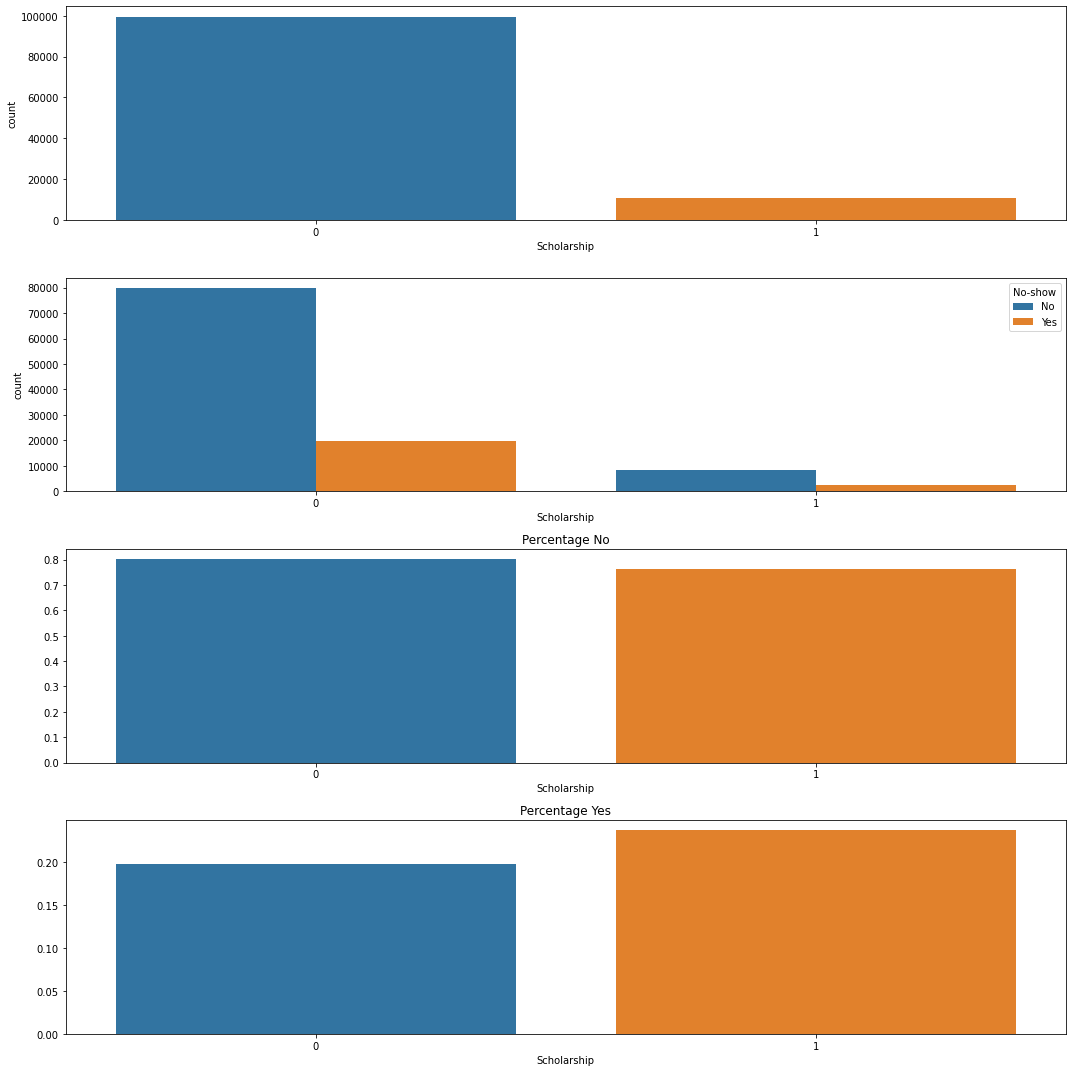

In [42]:
categoricalPLot(dataset, "Scholarship", "No-show")

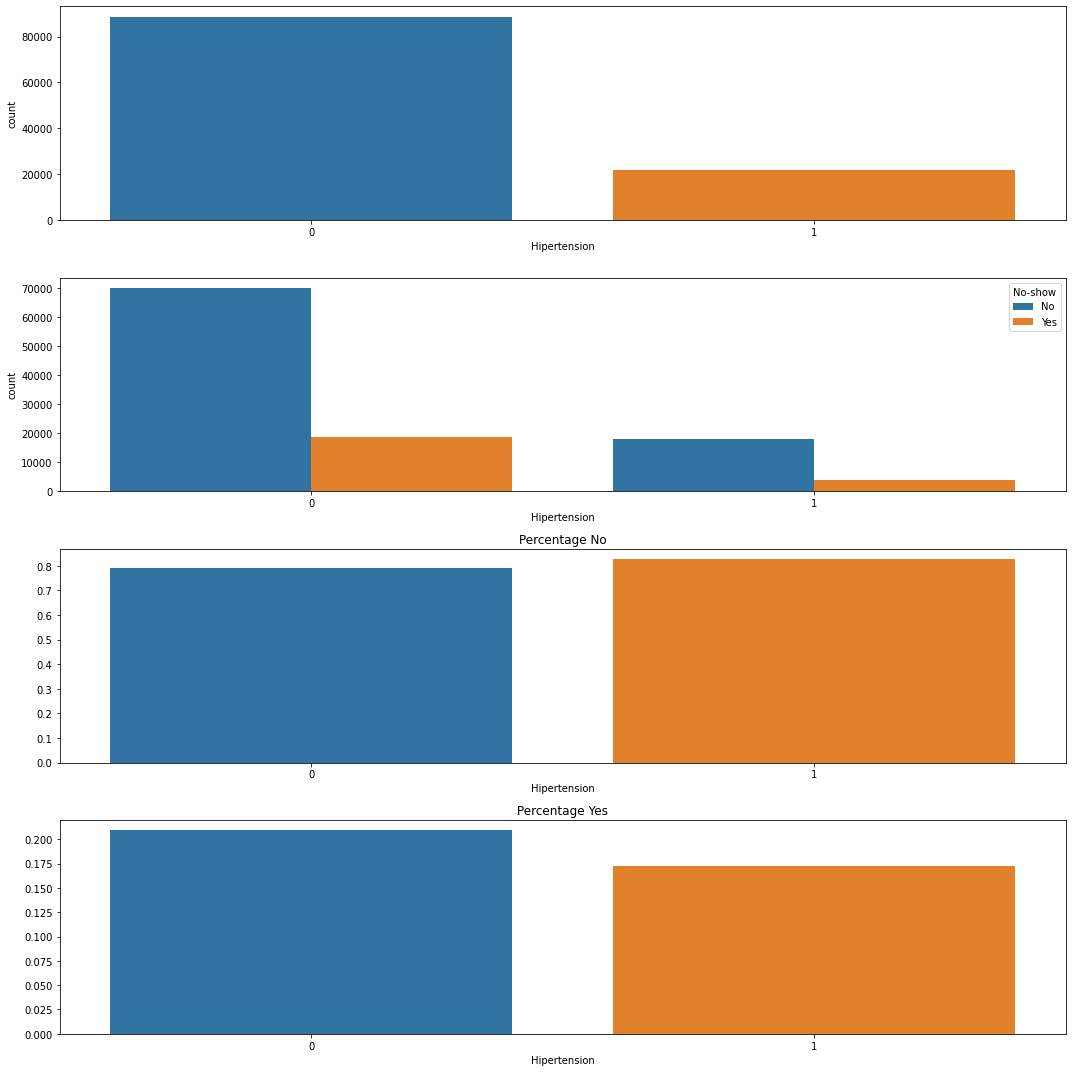

In [43]:
categoricalPLot(dataset, "Hipertension", "No-show")

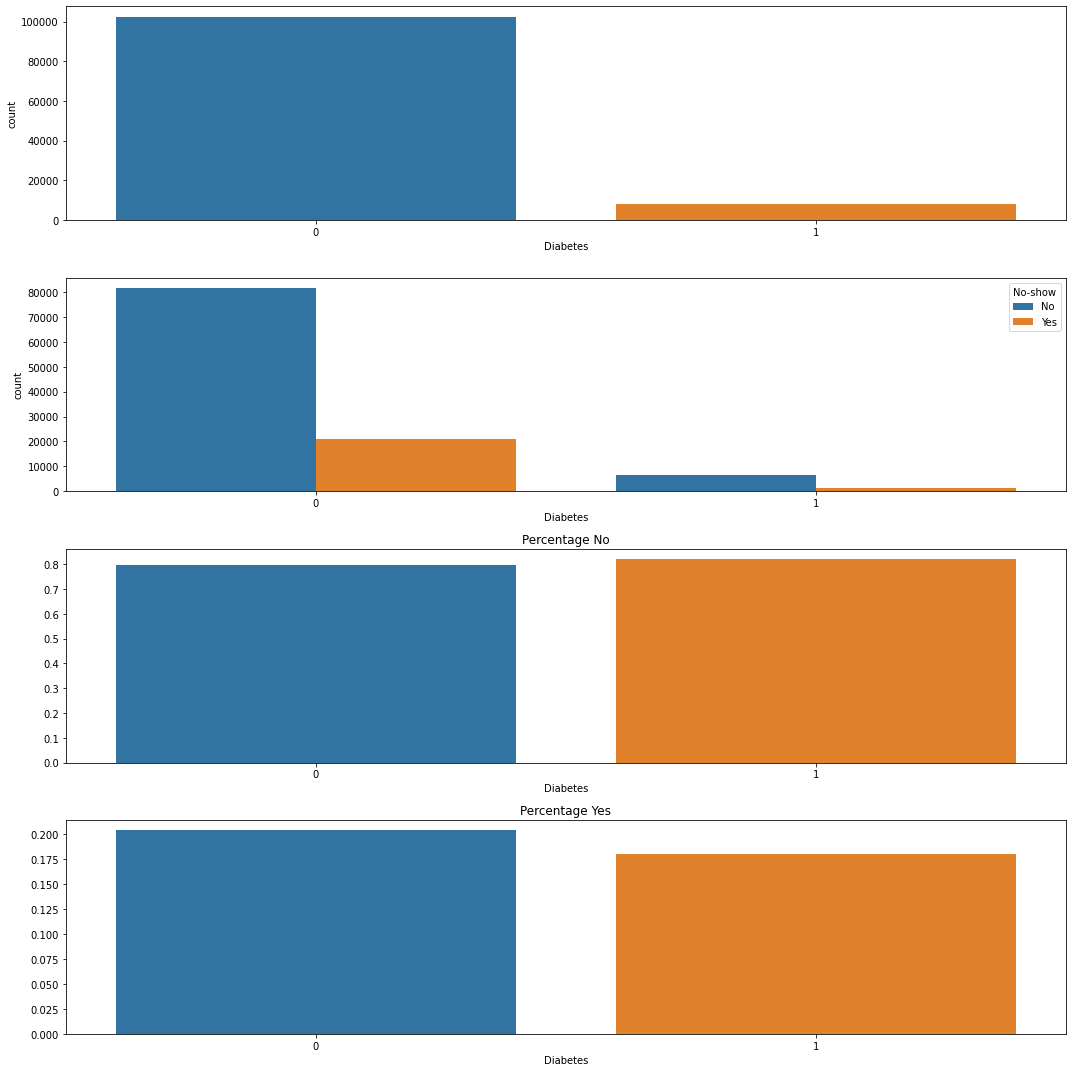

In [44]:
categoricalPLot(dataset, "Diabetes", "No-show")

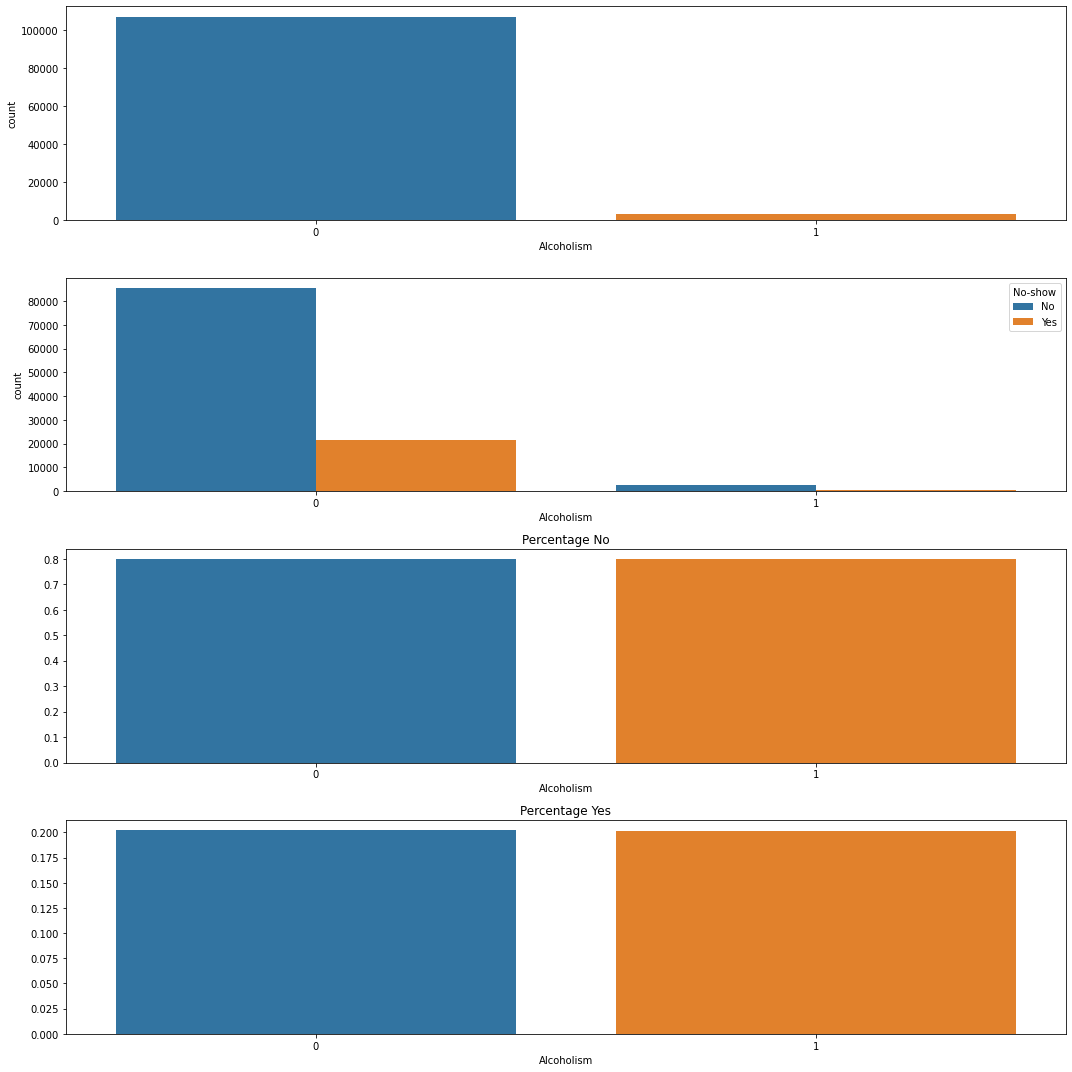

In [45]:
categoricalPLot(dataset, "Alcoholism", "No-show")

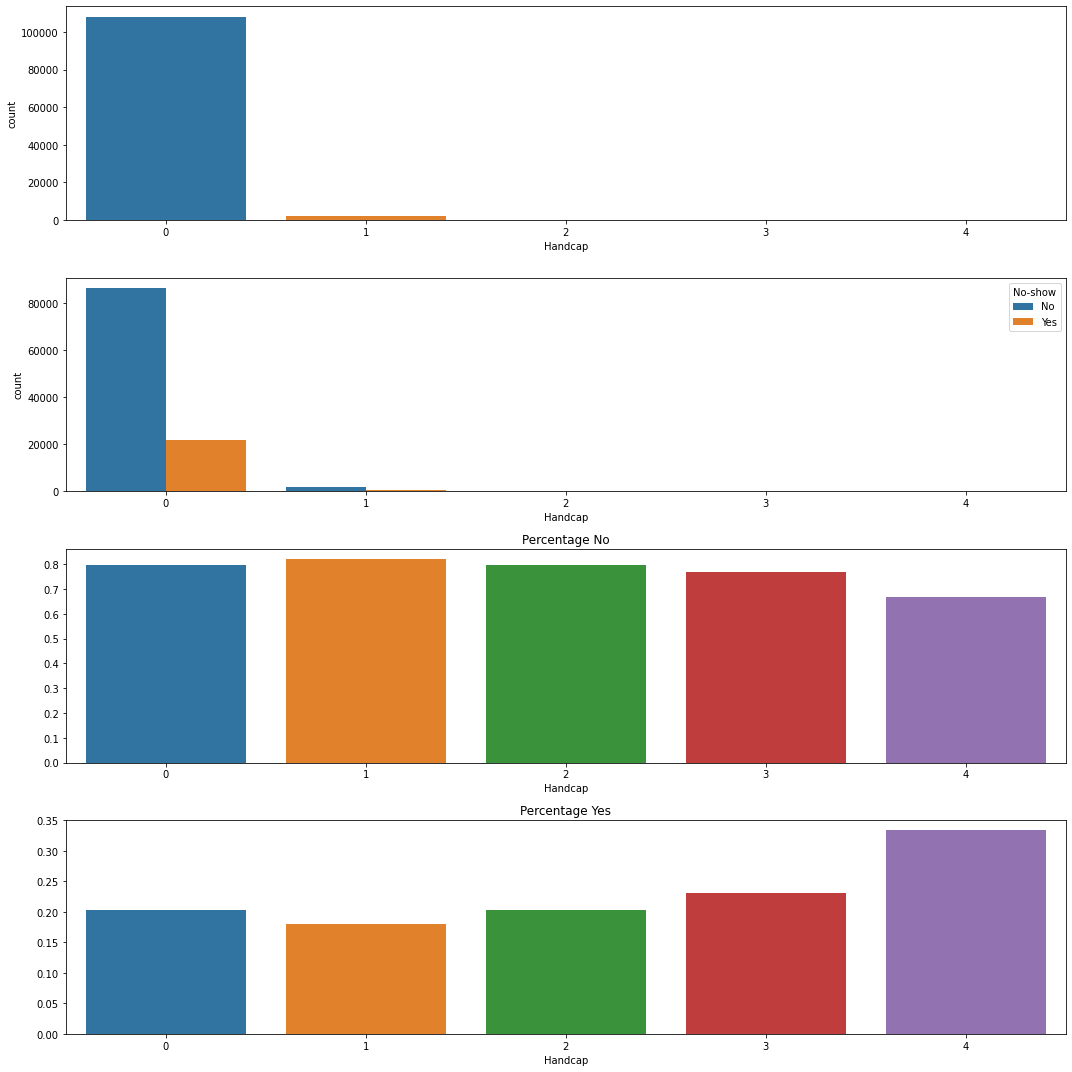

In [46]:
categoricalPLot(dataset, "Handcap", "No-show")

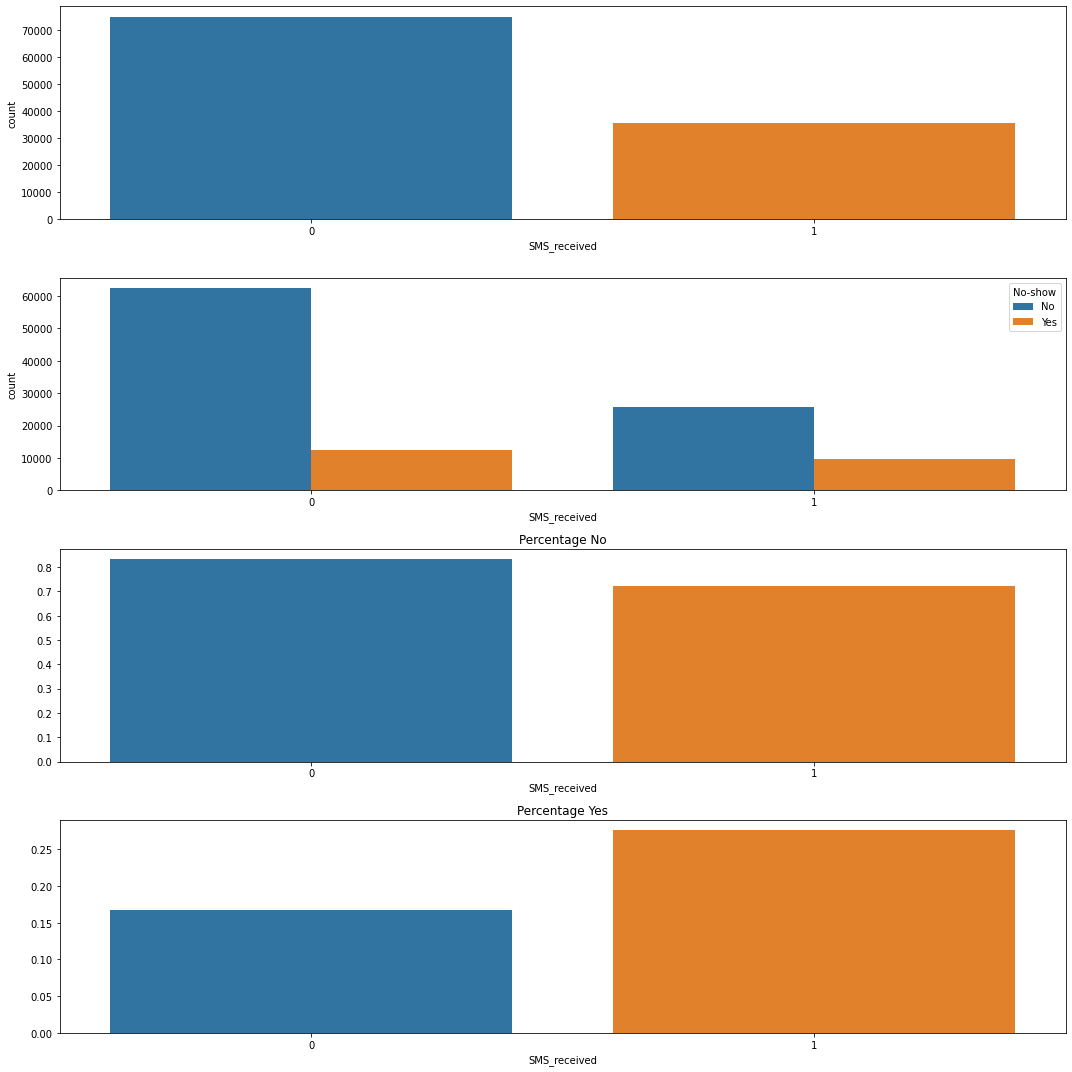

In [47]:
categoricalPLot(dataset, "SMS_received", "No-show")



> ScheduledDay



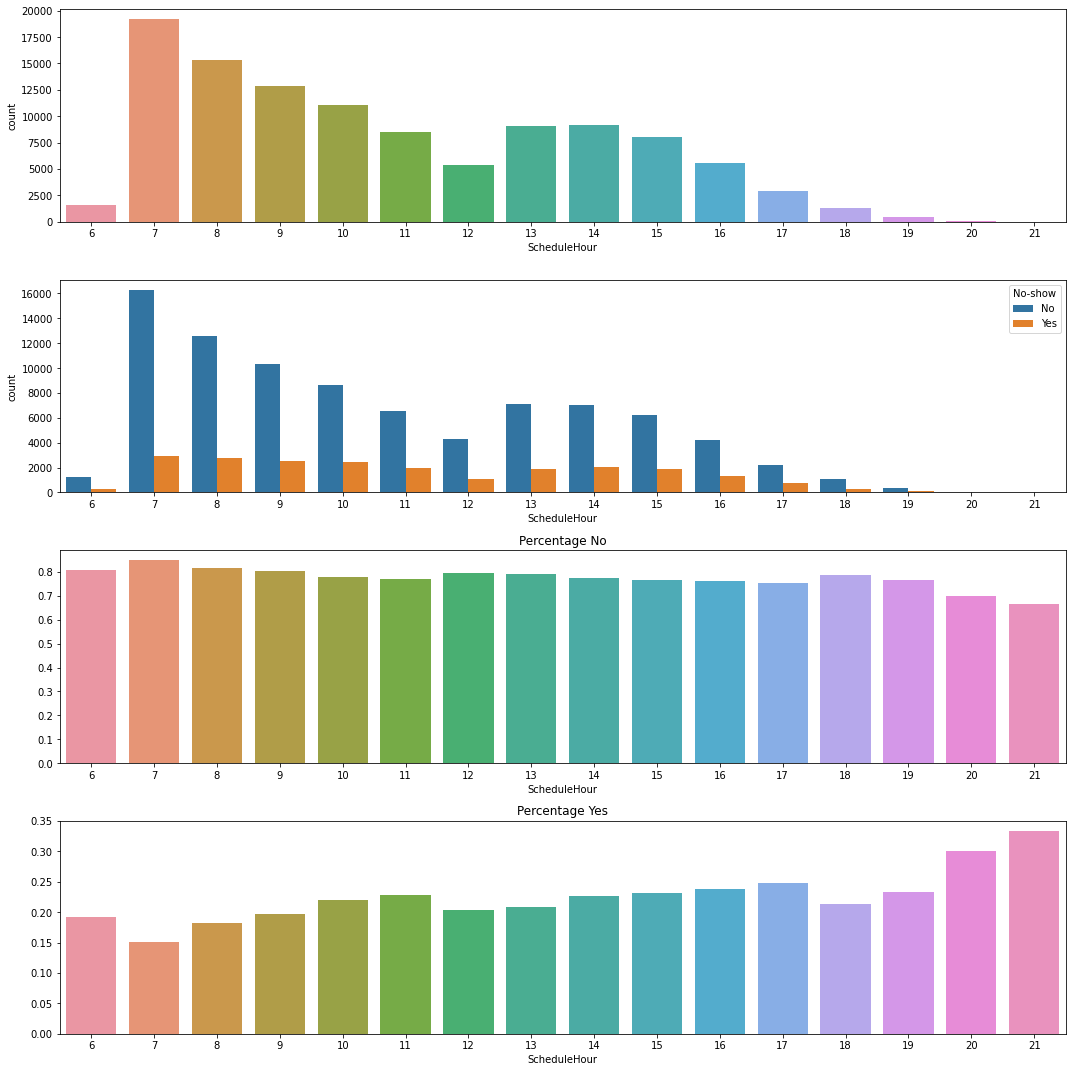

In [48]:
categoricalPLot(dataset, "ScheduleHour", "No-show")

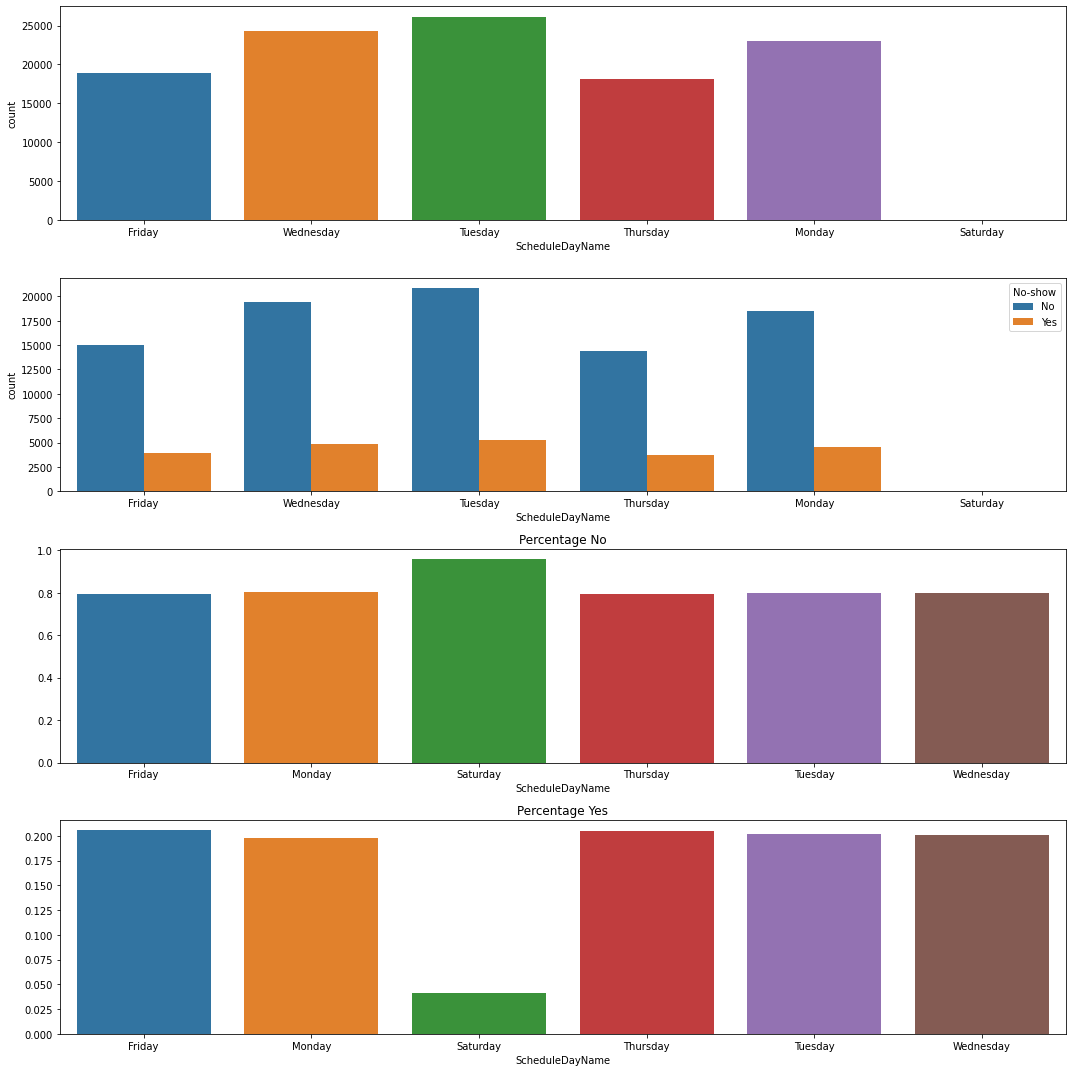

In [49]:
categoricalPLot(dataset, "ScheduleDayName", "No-show")

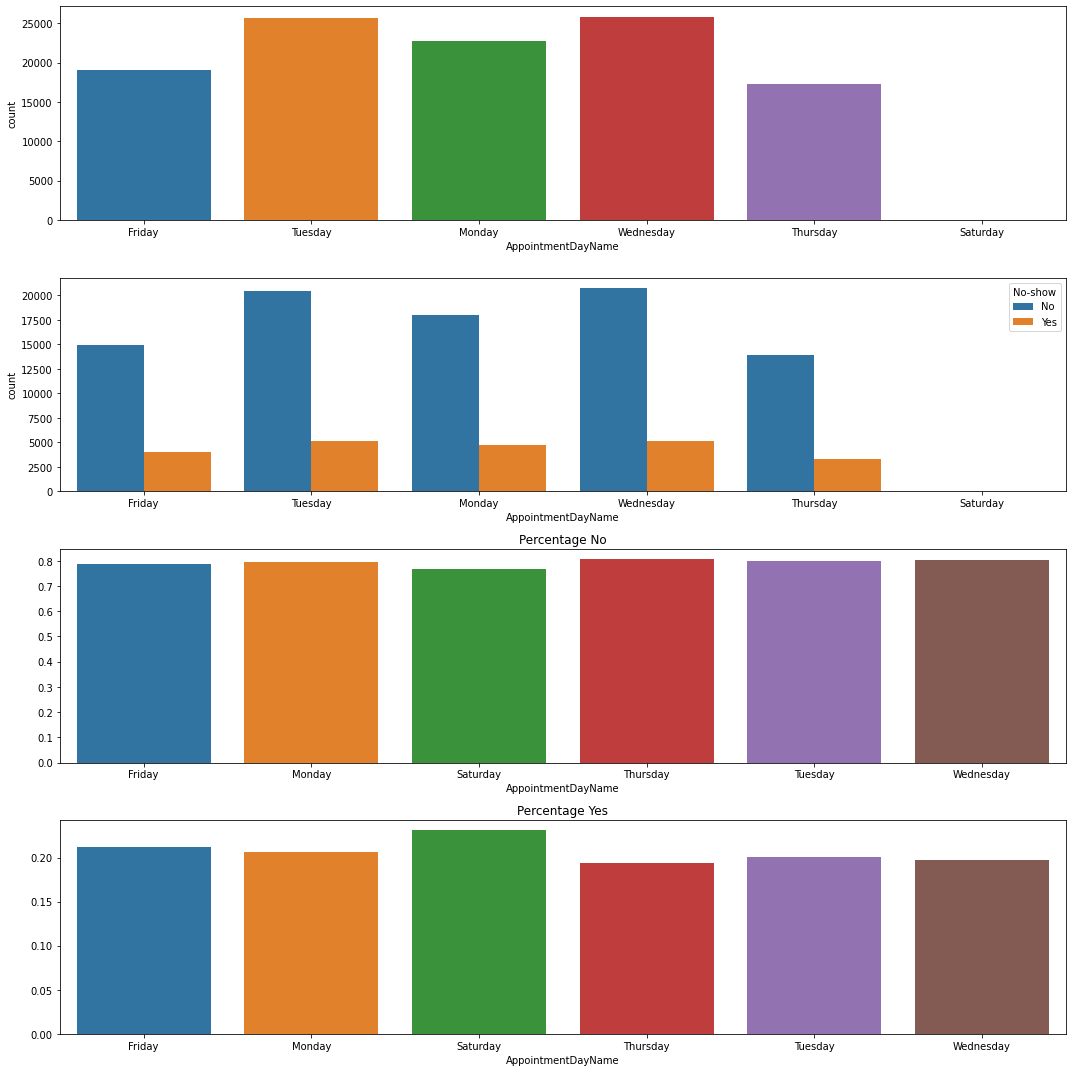

In [50]:
categoricalPLot(dataset, "AppointmentDayName", "No-show")

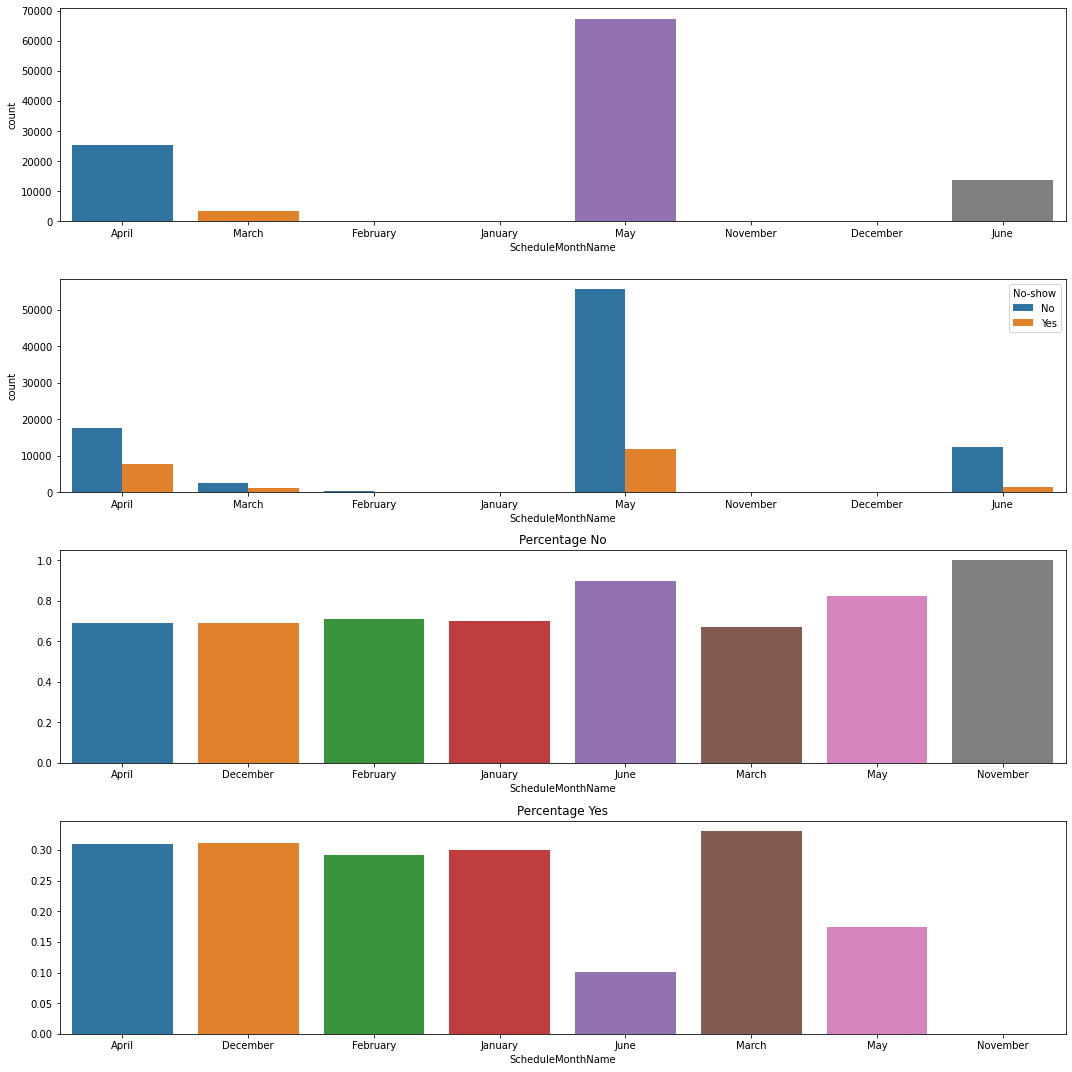

In [51]:
categoricalPLot(dataset, "ScheduleMonthName", "No-show")

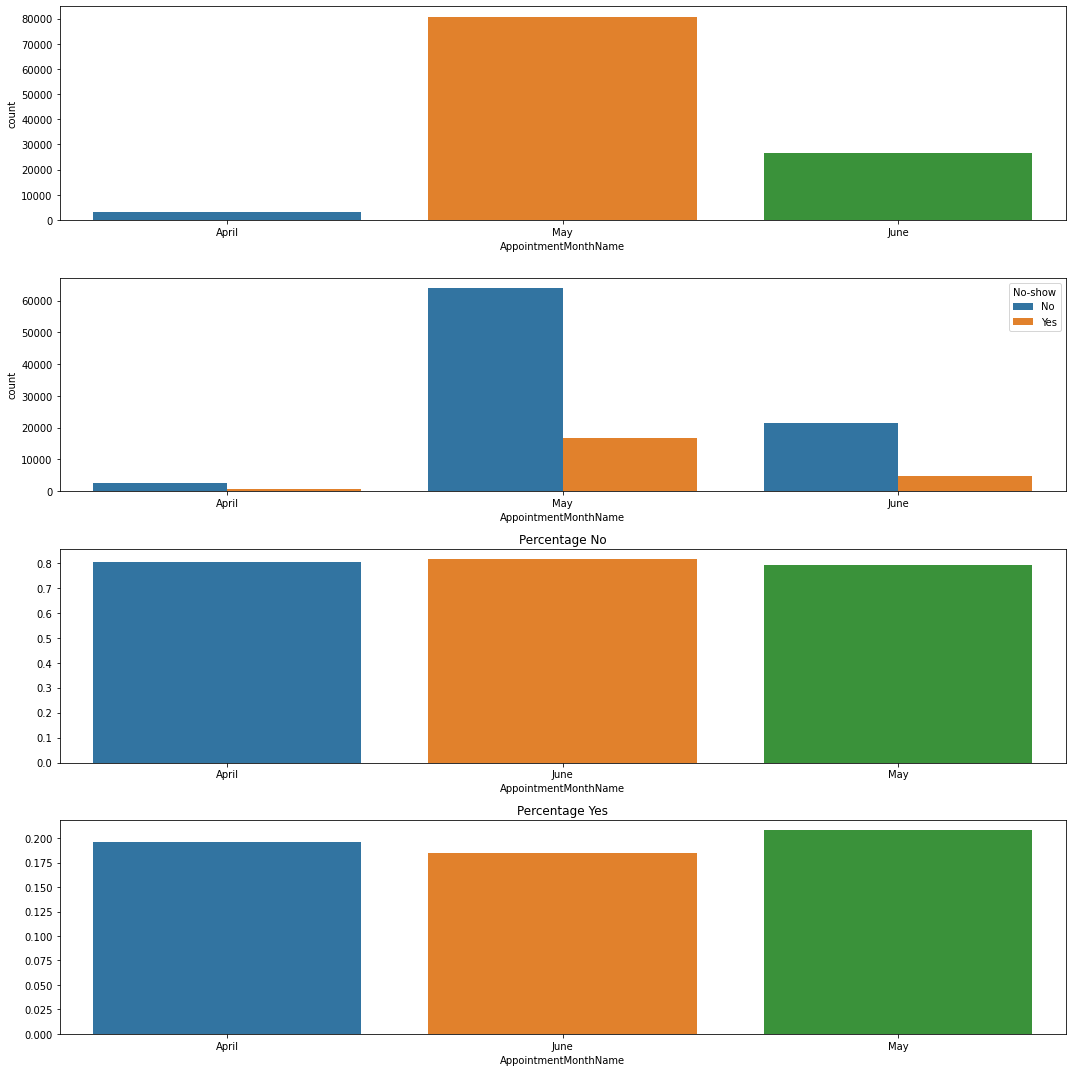

In [52]:
categoricalPLot(dataset, "AppointmentMonthName", "No-show")

In [53]:
dataset['Waiting_Time_days'] = dataset['AppointmentDay'] - dataset['ScheduledDay']
dataset['Waiting_Time_days'] = dataset['Waiting_Time_days'].dt.days

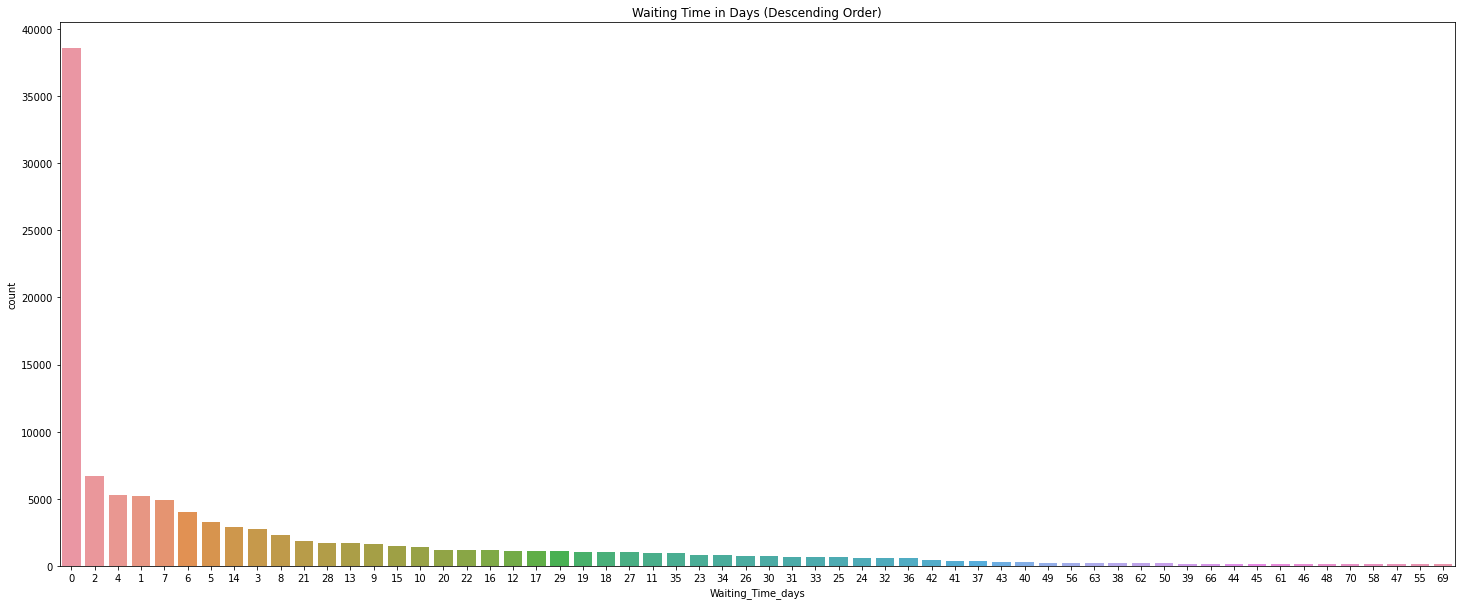

In [54]:

fig, ax = plt.subplots(1, 1, figsize=(25,10))
ax = sns.countplot(x=dataset.Waiting_Time_days, order=dataset.Waiting_Time_days.value_counts().iloc[:60].index)
ax.set_title("Waiting Time in Days (Descending Order)")
plt.show()
neptune.log_image("Waiting_Time_days", fig)

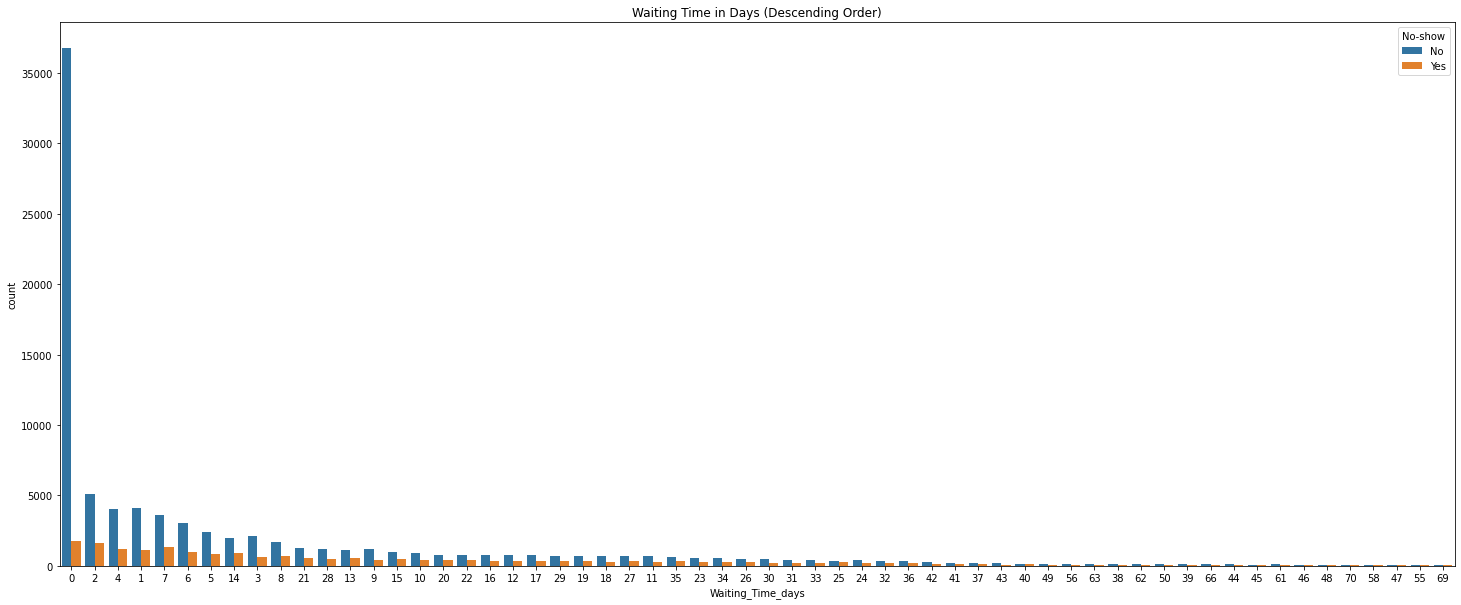

In [55]:
fig, ax = plt.subplots(1, 1, figsize=(25,10))
ax = sns.countplot(x=dataset.Waiting_Time_days, order=dataset.Waiting_Time_days.value_counts().iloc[:60].index, hue= dataset["No-show"])
ax.set_title("Waiting Time in Days (Descending Order)")
plt.show()
neptune.log_image("Waiting_Time_days", fig)

In [56]:
neptune.stop()